In [168]:
import matplotlib.pyplot as plt
import numpy as np
import pprint
import os, sys
import seaborn as sns
import pandas as pd
import itertools

In [151]:
output_fig_dir = "..\\figs\\"
if not os.path.isdir(output_fig_dir):
    os.mkdir(output_fig_dir)

In [411]:
# B4 + DP + OPT
#   num lin constraints: 0
#   num sos constraints: 1396
#   num variables: 2924
#   latency: 1325 s
# B4 + DP
#   num lin constraints: 38
#   num variables: 58
#   latency: 6 ms
# B4 + OPT
#   num lin constraints: 76
#   num variables: 114
#   latency: 10 ms
# B4 + POP + OPT
#   num lin constraints: 0
#   num sos constraints: 906
#   num variables: 1944
#   latency: 32 s
# B4 + POP
#   num lin constraints: 36.5 [35, 38]
#   num variables: 53.5 [53, 54]
#   latency: 6.5ms
data = [
    
    {"value": 103, "type": "#lin constr", "label": "POP"},
    {"value": 0, "type": "#sos constr", "label": "POP"},
    {"value": 265, "type": "#var", "label": "POP"},
    {"value": 0.015, "type": "latency(s)", "label": "POP"},

    {"value": 155, "type": "#lin constr", "label": "DP"},
    {"value": 0, "type": "#sos constr", "label": "DP"},
    {"value": 355, "type": "#var", "label": "DP"},
    {"value": 0.017, "type": "latency(s)", "label": "DP"},

    {"value": 170, "type": "#lin constr", "label": "OPT"},
    {"value": 0, "type": "#sos constr", "label": "OPT"},
    {"value": 396, "type": "#var", "label": "OPT"},
    {"value": 0.018, "type": "latency(s)", "label": "OPT"},
    
    {"value": 906, "type": "#lin constr", "label": "POP + OPT"},
    {"value": 906, "type": "#sos constr", "label": "POP + OPT"},
    {"value": 1944, "type": "#var", "label": "POP + OPT"},
    {"value": 32, "type": "latency(s)", "label": "POP + OPT"},
    
    {"value": 1396, "type": "#lin constr", "label": "DP + OPT"},
    {"value": 1396, "type": "#sos constr", "label": "DP + OPT"},
    {"value": 2924, "type": "#var", "label": "DP + OPT"},
    {"value": 1325, "type": "latency(s)", "label": "DP + OPT"},
]

before_presolve_data = [

    {"value": 191, "type": "#lin constr", "label": "DP"},
    {"value": 0, "type": "#sos constr", "label": "DP"},
    {"value": 115, "type": "#var", "label": "DP"},
    
    {"value": 0, "type": "#sos constr", "label": "POP"},
    {"value": 229, "type": "#lin constr", "label": "POP"},
    {"value": 93, "type": "#var", "label": "POP"},

    {"value": 76, "type": "#lin constr", "label": "OPT"},
    {"value": 0, "type": "#sos constr", "label": "OPT"},
    {"value": 114, "type": "#var", "label": "OPT"},
    
    {"value": 4819, "type": "#lin constr", "label": "POP + OPT"},
    {"value": 906, "type": "#sos constr", "label": "POP + OPT"},
    {"value": 3913, "type": "#var", "label": "POP + OPT"},
    
    {"value": 6908, "type": "#lin constr", "label": "DP + OPT"},
    {"value": 1396, "type": "#sos constr", "label": "DP + OPT"},
    {"value": 5512, "type": "#var", "label": "DP + OPT"},
]

data_a = [191, None, 115, None, 229, None, 93, None, 76, None, 114, None, 4819, None, 3913, None, 6908, None, 5512, None]

In [412]:
df = pd.DataFrame(data)
pre_df = pd.DataFrame(before_presolve_data)

In [413]:
df

,value,type,label
0,103.000,#lin constr,POP
1,0.000,#sos constr,POP
2,265.000,#var,POP
3,0.015,latency(s),POP
4,155.000,#lin constr,DP
5,0.000,#sos constr,DP
6,355.000,#var,DP
7,0.017,latency(s),DP
8,170.000,#lin constr,OPT
9,0.000,#sos constr,OPT


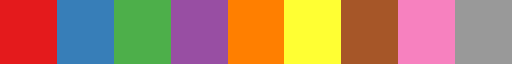

In [414]:
color_pallette = plt.get_cmap("Set1")
color_pallette

In [415]:
colors = [color_pallette(1), color_pallette(0), color_pallette(3), color_pallette(4), color_pallette(2), color_pallette(7)]

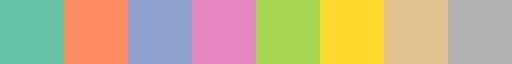

In [416]:
color_pallette2 = plt.get_cmap("Set2")
color_pallette2

In [417]:
colors_behind = [color_pallette2(4), color_pallette2(3), color_pallette2(0), color_pallette2(1), color_pallette2(2), color_pallette2(7)]

In [418]:
# plt.figure(figsize=(8, 3), dpi=300)
# f, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, sharex=True, gridspec_kw={'hspace':0.05}, dpi=300, figsize=(8, 3))

# sns.barplot(x="type", y="value", hue="label", data=df, palette=colors, ax=ax_top)
# sns.barplot(x="type", y="value", hue="label", data=df, palette=colors, ax=ax_bottom)
# for idx, rect in enumerate(ax_top.patches):
#     height = rect.get_height()
#     bias = 0
#     rot = 45
#     if height.is_integer():
#         height = int(height)
#     elif height < 0.01:
#         bias = 0.05
#     if height < 0.02:
#         continue
#     ax_top.text(rect.get_x() + rect.get_width() / 2. + bias, 1.001 * height, f"{height}", ha="center", va="bottom", fontsize=8,
#             rotation=rot
#             )

# for idx, rect in enumerate(ax_bottom.patches):
#     height = rect.get_height()
#     bias = 0
#     rot = 45
#     if height.is_integer():
#         height = int(height)
#     elif height < 0.01:
#         bias = 0
#     if height == 0:
#         height = 0.0
#     if height > 0.02:
#         continue
#     ax_bottom.text(rect.get_x() + rect.get_width() / 2. + bias, 1.001 * height, f"{height}", ha="center", va="bottom", fontsize=8,
#             rotation=rot
#             )
# ax_top.set_ylim(10, 3300)   # those limits are fake
# ax_bottom.set_ylim(0,0.015)

# sns.despine(ax=ax_bottom)
# sns.despine(ax=ax_top, bottom=True)

# ax_bottom.get_legend().set_visible(False)
# ax_top.get_legend().set_title("")
# ax_top.legend(ncol=2)
# # plt.xticks(fontsize=14)
# # plt.yticks(fontsize=14)
# ax_top.grid(color='black', linestyle="dashed", linewidth=1, alpha=0.3)
# ax_top.set_axisbelow(True)
# ax_bottom.grid(color='black', linestyle="dashed", linewidth=1, alpha=0.3)
# ax_bottom.set_axisbelow(True)
# ax_top.set_xlabel("")
# ax_top.set_ylabel("")
# ax_bottom.set_xlabel("")
# ax_bottom.set_ylabel("")

# d = .015  # how big to make the diagonal lines in axes coordinates
# # arguments to pass to plot, just so we don't keep repeating them
# kwargs = dict(transform=ax_top.transAxes, color='k', clip_on=False)
# ax_top.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# # ax_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

# kwargs.update(transform=ax_bottom.transAxes)  # switch to the bottom axes
# ax_bottom.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# # ax_bottom.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
# # plt.legend(fontsize=12, loc="upper left")

In [419]:
# fig, (ax, ax3) = plt.subplots(2, 1, figsize=(8, 3), dpi=300)

# sns.barplot(x="type", y="value", hue="label", data=pre_df, palette=colors_behind, edgecolor = '0.2', ax=ax)
# sns.barplot(x="type", y="value", hue="label", data=df, palette=colors, edgecolor = '0.2', ax=ax)
# sns.barplot(x="type", y="value", hue="label", data=df, palette=colors, edgecolor = '0.2', ax=ax3)
# for hax, lb, ub in [(ax, 500, 10000), (ax3, 0, 100)]:
#     for idx, rect in enumerate(hax.patches):
#         height = rect.get_height()
#         bias = 0
#         rot = 90
#         if height.is_integer():
#             height = int(height)
#         elif height < 0.01:
#             bias = 0
#         if height < lb or height > ub:
#             continue
#         # if height == 0:
#         #     height = 0.0
#         unit = ""
#         nheight = height
#         if height > 1000:
#             nheight = np.round(height / 1000, 1)
#             unit = "K"
#         hax.text(rect.get_x() + rect.get_width() / 2. + bias, 1.01 * height, f"{nheight}{unit}", ha="center", va="bottom", fontsize=9,
#                 rotation=rot
#                 )
# ax3.set_ylim(0, 100)
# ax.set_ylim(500, 7000)
# ax.spines.bottom.set_visible(False)
# ax3.spines.top.set_visible(False)
# ax.xaxis.tick_top()
# ax.tick_params(labeltop=False)  # don't put tick labels at the top
# ax3.xaxis.tick_bottom()

# num_bars = len(df["type"].unique())
# print(num_bars)
# # hatches = itertools.cycle(['/', '//', '+', 'o', 'x'][:num_bars + 1])
# # for i, bar in enumerate(ax.patches):
# #     if i % num_bars == 0:
# #         hatch = next(hatches)
# #     bar.set_hatch(hatch)
# # plt.xticks(fontsize=14)
# # plt.yticks(fontsize=14)
# ax.grid(color='black', linestyle="dashed", linewidth=1, alpha=0.3)
# ax.set_axisbelow(True)
# ax.set_xlabel("")
# ax.set_ylabel("")
# ax3.grid(color='black', linestyle="dashed", linewidth=1, alpha=0.3)
# ax3.set_axisbelow(True)
# ax3.set_xlabel("")
# ax3.set_ylabel("")
# # ax3.legend(ncol = 2, loc = 'lower right')
# # ax2.legend(ncol = 2, loc = 'lower right')
# # ax3.get_legend().set_visible(False)
# ax3.legend(ncol=2, title="", fontsize=12, loc="upper left", bbox_to_anchor=(0, 1.001))
# ax.get_legend().set_visible(False)
# # ax2.legend().set_visible(False)
# # plt.legend(title="", fontsize=12, ncol=2)
# # plt.ylim([-0.001, 8000])

# plt.savefig(output_fig_dir + "b4_problem_scale.jpg", bbox_inches="tight", format="jpg", dpi=300)
# plt.savefig(output_fig_dir + "b4_problem_scale.pdf", bbox_inches="tight", format="pdf", dpi=300)

4


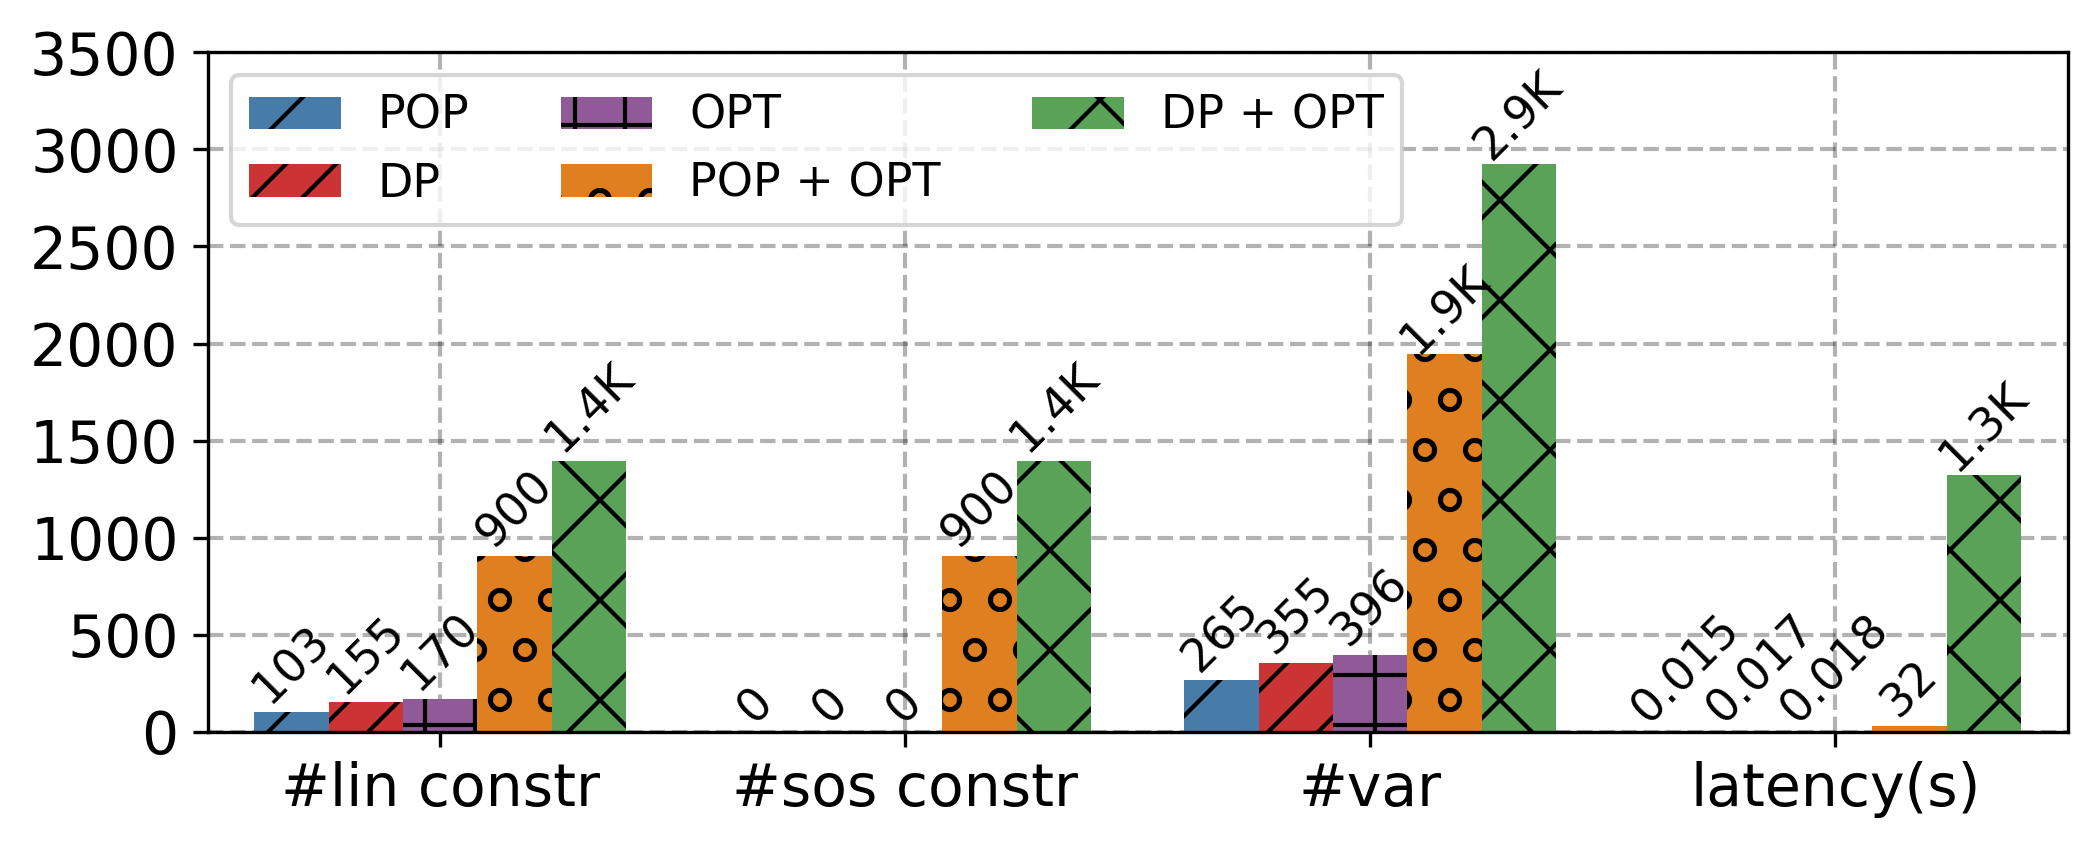

In [420]:
plt.figure(figsize=(8, 3), dpi=300)

ax = sns.barplot(x="type", y="value", hue="label", data=df, palette=colors)
for idx, rect in enumerate(ax.patches):
    height = rect.get_height()
    bias = 0
    rot = 45
    if height.is_integer():
        height = int(height)
    elif height < 0.01:
        bias = 0.05
    
    if height > 500:
        height = np.round(height, -2)
    nheight = height
    unit = ""
    if height > 1000:
        nheight = height / 1000
        unit = "K"

    # if height == 0:
    #     height = 0.0
    # print(rect.get_a())
    lab = f"{nheight}{unit}"
    nlab = ""
    if idx < len(data_a):
        bheight = data_a[idx]
        if bheight is not None:
            unit = ""
            if bheight > 50:
                bheight = np.round(bheight, -1)   
            if bheight > 500:
                bheight = np.round(bheight, -2)
            if bheight > 1000:
                bheight = bheight / 1000
                unit = "K"
            nlab += f" [{bheight}{unit}]"
    ax.text(rect.get_x() + rect.get_width() / 2. + bias, 1.001 * height, f"{lab}", ha="center", va="bottom", fontsize=11,
            rotation=rot
            )
num_bars = len(df["type"].unique())
print(num_bars)
hatches = itertools.cycle(['/', '//', '+', 'o', 'x'][:num_bars + 1])
for i, bar in enumerate(ax.patches):
    if i % num_bars == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.grid(color='black', linestyle="dashed", linewidth=1, alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("")
ax.set_ylabel("")
plt.legend(title="", fontsize=11, ncol=3, loc="upper left")
plt.ylim([-0.001, 3500])

plt.savefig(output_fig_dir + "b4_problem_scale.jpg", bbox_inches="tight", format="jpg", dpi=300)
plt.savefig(output_fig_dir + "b4_problem_scale.pdf", bbox_inches="tight", format="pdf", dpi=300)

In [421]:
# 5, 27, 11
# 0, 23, 15
# 2.5, 24, 11
# 7.5, 22, 10
#